In [1]:
import h5py
import itertools
import numpy as np
from matplotlib import ticker
import matplotlib.pyplot as plt
from scipy.ndimage.filters import gaussian_filter1d

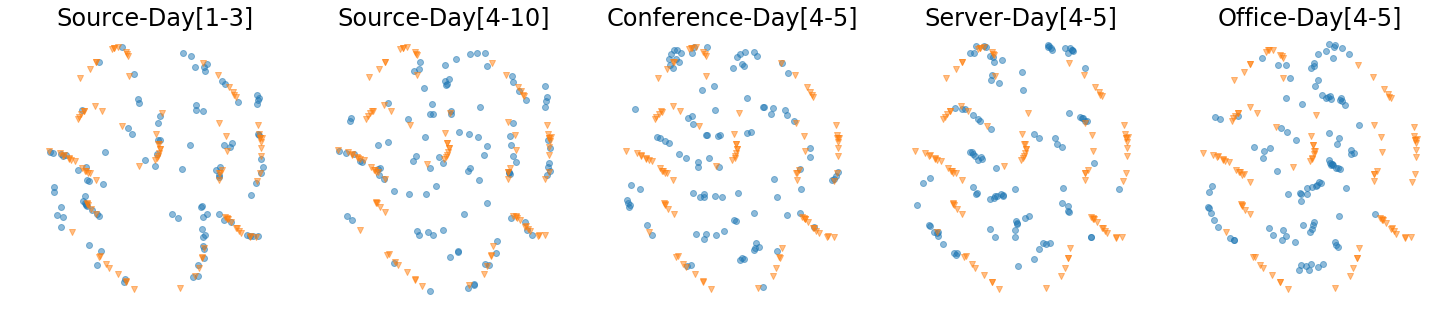

In [3]:
train_source_days = 3
train_server_days = 3
train_conference_days = 0

#checkpoint_path="mmwave/logs/FinalExp/Source/epochs:1000-init_lr:0.001-num_features:128-model_filters:64-activation_fn:selu-batch_size:64-num_classes:10-train_source_days:{}-anneal:4-s:10-m:0.1-ca:0.001-notes:AMCABaseline/t-SNE.npy".format(train_source_days)
#checkpoint_path="mmwave/logs/FinalExp/SourceTargetLabeled/epochs:1000-init_lr:0.001-num_features:128-model_filters:64-activation_fn:selu-batch_size:64-num_classes:10-train_source_days:{}-train_server_days:{}-train_conference_days:{}-anneal:4-s:10-m:0.1-ca:0.001-notes:AMCABaseline/t-SNE.npy".format(train_source_days, train_server_days, train_conference_days)
checkpoint_path="mmwave/logs/FinalExp/SourceTargetUnlabeled/epochs:10000-init_lr:0.001-num_features:128-model_filters:64-batch_size:64-train_src_days:{}-train_trg_days:0-train_ser_days:{}-train_con_days:{}-m:0.1-dm_lambda:0.001-disc_hidden:128-notes:ResnetAMCA_DomClas_GAN/t-SNE.npy".format(train_source_days, train_server_days, train_conference_days)

fig, (ax6, ax7, ax8, ax9, ax10) = plt.subplots(1, 5, figsize=(25,5))

X_embedded = np.load(checkpoint_path)

train = np.arange(2565)
np.random.shuffle(train)

s = 2565
tmp = np.arange(s,s+2496)
np.random.shuffle(tmp)
ax9.axis('off')
ax9.scatter(X_embedded[tmp[:100], 0], 
            X_embedded[tmp[:100], 1], alpha=0.5)
ax9.scatter(X_embedded[train[:100], 0], 
            X_embedded[train[:100], 1], alpha=0.5, marker='v')
ax9.set_title("Server-Day[4-5]", fontsize=24)

s += 2496
tmp = np.arange(s,s+2500)
np.random.shuffle(tmp)
ax8.axis('off')
ax8.scatter(X_embedded[tmp[:100], 0], 
            X_embedded[tmp[:100], 1], alpha=0.5)
ax8.scatter(X_embedded[train[:100], 0], 
            X_embedded[train[:100], 1], alpha=0.5, marker='v')
ax8.set_title("Conference-Day[4-5]", fontsize=24)

s += 2500
tmp = np.arange(s,s+2498)
np.random.shuffle(tmp)
ax10.axis('off')
ax10.scatter(X_embedded[tmp[:100], 0], 
             X_embedded[tmp[:100], 1], alpha=0.5)
ax10.scatter(X_embedded[train[:100], 0], 
            X_embedded[train[:100], 1], alpha=0.5, marker='v')
ax10.set_title("Office-Day[4-5]", fontsize=24)

s += 2498
tmp = np.arange(s,s+285)
np.random.shuffle(tmp)
ax6.axis('off')
ax6.scatter(X_embedded[tmp[:100], 0], 
            X_embedded[tmp[:100], 1], alpha=0.5)
ax6.scatter(X_embedded[train[:100], 0], 
            X_embedded[train[:100], 1], alpha=0.5, marker='v')
ax6.set_title("Source-Day[1-{}]".format(train_source_days), fontsize=24)

s += 285
tmp = np.arange(s,X_embedded.shape[0])
np.random.shuffle(tmp)
ax7.axis('off')
ax7.scatter(X_embedded[tmp[:100], 0], 
            X_embedded[tmp[:100], 1], alpha=0.5)
ax7.scatter(X_embedded[train[:100], 0], 
            X_embedded[train[:100], 1], alpha=0.5, marker='v')
ax7.set_title("Source-Day[4-10]", fontsize=24)

plt.savefig('TargetUnLabelled{}{}{}'.format(train_source_days, 
                                          train_server_days, 
                                          train_conference_days), 
            bbox_inches='tight', pad_inches=0, dpi=400)

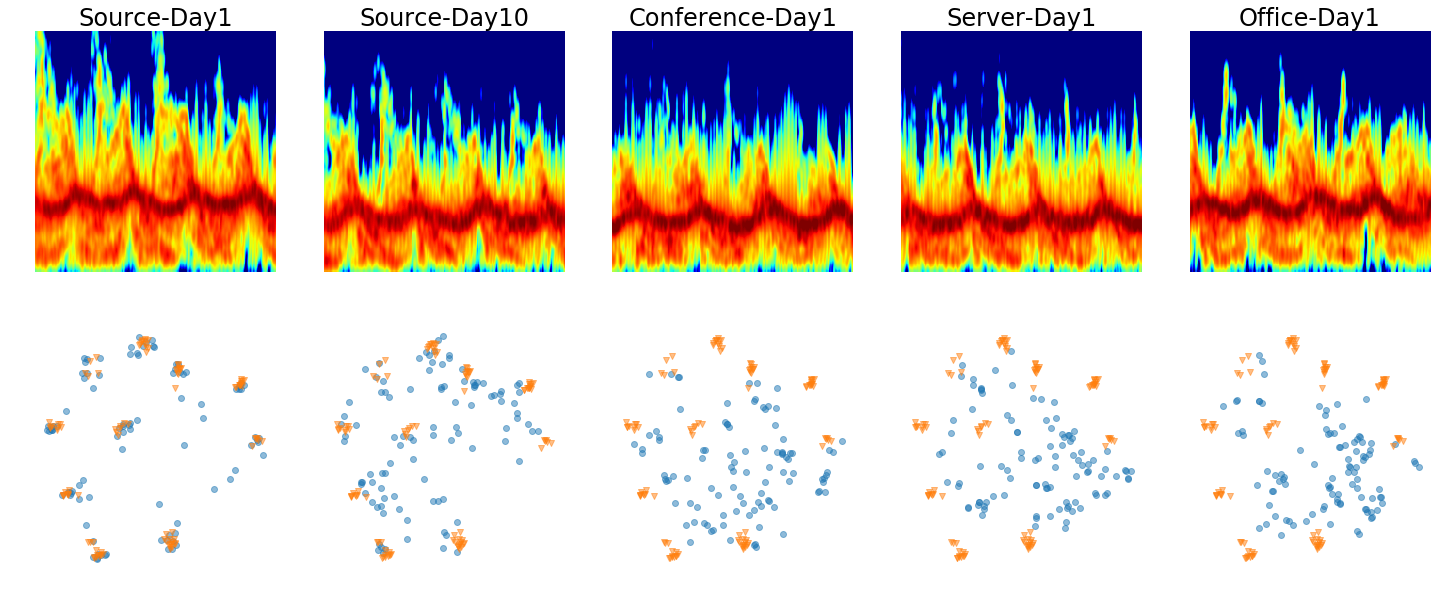

In [6]:
fig, ((ax1, ax2, ax3, ax4, ax5),(ax6, ax7, ax8, ax9, ax10)) = plt.subplots(2, 5, figsize=(25,10))

hf = h5py.File("mmwave/data/source_data.h5", 'r')
X_data = np.array(hf.get('X_data'))
hf.close()

ax1.axis('off')
ax1.imshow(X_data[0, ..., 0], cmap='jet', clim=(-120, -25))
ax1.set_title("Source-Day1", fontsize=24)

ax2.axis('off')
ax2.imshow(X_data[1000, ..., 0], cmap='jet', clim=(-120, -25))
ax2.set_title("Source-Day10", fontsize=24)

hf = h5py.File("mmwave/data/target_conf_data.h5", 'r')
X_data = np.array(hf.get('X_data'))
hf.close()

ax3.axis('off')
ax3.imshow(X_data[0, ..., 0], cmap='jet', clim=(-120, -25))
ax3.set_title("Conference-Day1", fontsize=24)

hf = h5py.File("mmwave/data/target_server_data.h5", 'r')
X_data = np.array(hf.get('X_data'))
hf.close()

ax4.axis('off')
ax4.imshow(X_data[4, ..., 0], cmap='jet', clim=(-120, -25))
ax4.set_title("Server-Day1", fontsize=24)

hf = h5py.File("mmwave/data/target_office_data.h5", 'r')
X_data = np.array(hf.get('X_data'))
hf.close()

ax5.axis('off')
ax5.imshow(X_data[2, ..., 0], cmap='jet', clim=(-120, -25))
ax5.set_title("Office-Day1", fontsize=24)

X_embedded = np.load("tsne.npy")

train = np.arange(855)
np.random.shuffle(train)

s = 855
tmp = np.arange(s,s+2496)
np.random.shuffle(tmp)
ax9.axis('off')
ax9.scatter(X_embedded[tmp[:100], 0], 
            X_embedded[tmp[:100], 1], alpha=0.5)
ax9.scatter(X_embedded[train[:100], 0], 
            X_embedded[train[:100], 1], alpha=0.5, marker='v')

s += 2496
tmp = np.arange(s,s+2500)
np.random.shuffle(tmp)
ax8.axis('off')
ax8.scatter(X_embedded[tmp[:100], 0], 
            X_embedded[tmp[:100], 1], alpha=0.5)
ax8.scatter(X_embedded[train[:100], 0], 
            X_embedded[train[:100], 1], alpha=0.5, marker='v')

s += 2500
tmp = np.arange(s,s+2498)
np.random.shuffle(tmp)
ax10.axis('off')
ax10.scatter(X_embedded[tmp[:100], 0], 
             X_embedded[tmp[:100], 1], alpha=0.5)
ax10.scatter(X_embedded[train[:100], 0], 
            X_embedded[train[:100], 1], alpha=0.5, marker='v')

s += 2498
tmp = np.arange(s,s+95)
np.random.shuffle(tmp)
ax6.axis('off')
ax6.scatter(X_embedded[tmp[:100], 0], 
            X_embedded[tmp[:100], 1], alpha=0.5)
ax6.scatter(X_embedded[train[:100], 0], 
            X_embedded[train[:100], 1], alpha=0.5, marker='v')

s += 95
tmp = np.arange(s,s+8550)
np.random.shuffle(tmp)
ax7.axis('off')
ax7.scatter(X_embedded[tmp[:100], 0], 
            X_embedded[tmp[:100], 1], alpha=0.5)
ax7.scatter(X_embedded[train[:100], 0], 
            X_embedded[train[:100], 1], alpha=0.5, marker='v')

plt.savefig('Exp0', bbox_inches='tight', pad_inches=0, dpi=400)

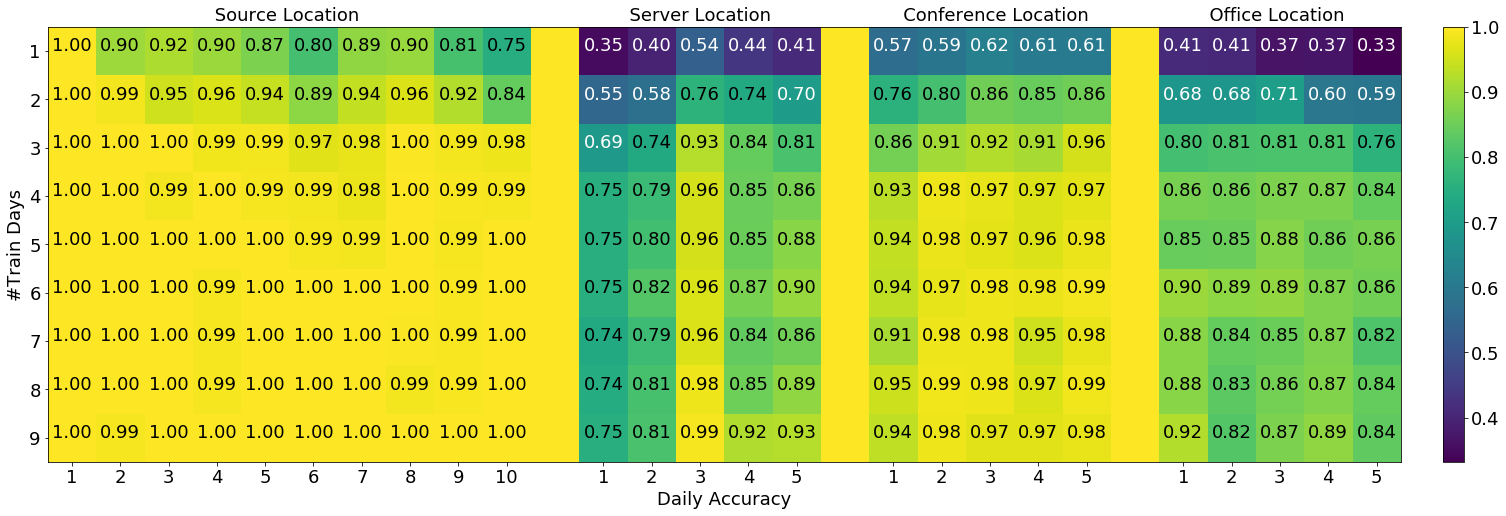

In [61]:
source_acc = np.zeros((9, 10), dtype=np.float32)
source_acc[0] = [
1.0,
0.9031578898429871,
0.9189473390579224,
0.8989473581314087,
0.8673684000968933,
0.8021052479743958,
0.8894736766815186,
0.8957894444465637,
0.8063157796859741,
0.7494736909866333] 

source_acc[1] = [
1.0,
0.9893617033958435,
0.9505262970924377,
0.9621052742004395,
0.942105233669281,
0.8863157629966736,
0.9389473795890808,
0.9642105102539062,
0.9231578707695007,
0.8431578874588013]

source_acc[2] = [
1.0,
1.0,
1.0,
0.9863157868385315,
0.9894737005233765,
0.9705263376235962,
0.9789473414421082,
0.996842086315155,
0.9894737005233765,
0.9842105507850647]

source_acc[3] = [
1.0,
1.0,
0.9887640476226807,
1.0,
0.9905263185501099,
0.9873684048652649,
0.9810526371002197,
0.9978947639465332,
0.9926315546035767,
0.9915789365768433]

source_acc[4] = [
1.0,
1.0,
1.0,
1.0,
1.0,
0.9915789365768433,
0.9894737005233765,
0.9989473819732666,
0.9915789365768433,
0.9989473819732666]

source_acc[5] = [
1.0,
1.0,
1.0,
0.9896907210350037,
1.0,
1.0,
0.9978947639465332,
1.0,
0.9936842322349548,
0.9989473819732666]

source_acc[6] = [
1.0,
1.0,
1.0,
0.9896907210350037,
1.0,
1.0,
1.0,
0.996842086315155,
0.9926315546035767,
0.9989473819732666]

source_acc[7] = [
1.0,
1.0,
1.0,
0.9901960492134094,
1.0,
1.0,
1.0,
0.9882352948188782,
0.9947368502616882,
1.0]


source_acc[8] = [
1.0,
0.9895833134651184,
1.0,
1.0,
1.0,
1.0,
1.0,
1.0,
1.0,
0.9989473819732666]

server_acc = np.zeros((9, 5), dtype=np.float32)
server_acc[0] = [
0.35211268067359924,
0.3959999978542328,
0.5360000133514404,
0.43887776136398315,
0.41200000047683716]

server_acc[1] = [
0.5513078570365906,
0.578000009059906,
0.7639999985694885,
0.7374749779701233,
0.7020000219345093]

server_acc[2] = [
0.6901408433914185,
0.7379999756813049,
0.9259999990463257,
0.8416833877563477,
0.8080000281333923]

server_acc[3] = [
0.7525150775909424,
0.7879999876022339,
0.9580000042915344,
0.8476954102516174,
0.8619999885559082]

server_acc[4] = [
0.7525150775909424,
0.7979999780654907,
0.9580000042915344,
0.8496993780136108,
0.8820000290870667]

server_acc[5] = [
0.7545271515846252,
0.8220000267028809,
0.9620000123977661,
0.8657314777374268,
0.8980000019073486]

server_acc[6] = [
0.7384305596351624,
0.7900000214576721,
0.9639999866485596,
0.8396793603897095,
0.8560000061988831]

server_acc[7] = [
0.7444667816162109,
0.8059999942779541,
0.984000027179718,
0.851703405380249,
0.8899999856948853]

server_acc[8] = [
0.7545271515846252,
0.8080000281333923,
0.9900000095367432,
0.9198396801948547,
0.9259999990463257]

conf_acc = np.zeros((9, 5), dtype=np.float32)
conf_acc[0] = [
0.5720000267028809,
0.5920000076293945,
0.6240000128746033,
0.6100000143051147,
0.6100000143051147]

conf_acc[1] = [
0.7620000243186951,
0.8040000200271606,
0.8560000061988831,
0.8460000157356262,
0.8560000061988831]

conf_acc[2] = [
0.8600000143051147,
0.9079999923706055,
0.9240000247955322,
0.9120000004768372,
0.9559999704360962]

conf_acc[3] = [
0.9319999814033508,
0.9819999933242798,
0.9739999771118164,
0.9660000205039978,
0.972000002861023]

conf_acc[4] = [
0.9380000233650208,
0.9800000190734863,
0.972000002861023,
0.9639999866485596,
0.9800000190734863]

conf_acc[5] = [
0.9359999895095825,
0.9739999771118164,
0.9819999933242798,
0.9800000190734863,
0.9879999756813049]

conf_acc[6] = [
0.9120000004768372,
0.9819999933242798,
0.9819999933242798,
0.9520000219345093,
0.9779999852180481]

conf_acc[7] = [
0.9480000138282776,
0.9860000014305115,
0.9819999933242798,
0.9660000205039978,
0.9860000014305115]

conf_acc[8] = [
0.9359999895095825,
0.984000027179718,
0.9700000286102295,
0.9700000286102295,
0.9779999852180481]

office_acc = np.zeros((9, 5), dtype=np.float32)
office_acc[0] = [
0.41200000047683716,
0.4059999883174896,
0.36673346161842346,
0.37074148654937744,
0.3319999873638153]

office_acc[1] = [
0.6819999814033508,
0.6840000152587891,
0.7054108381271362,
0.5971943736076355,
0.5920000076293945]

office_acc[2] = [
0.800000011920929,
0.8080000281333923,
0.8116232752799988,
0.8096192479133606,
0.7639999985694885]

office_acc[3] = [
0.8619999885559082,
0.8579999804496765,
0.8677354454994202,
0.8677354454994202,
0.8420000076293945]

office_acc[4] = [
0.8460000157356262,
0.8479999899864197,
0.8777555227279663,
0.8557114005088806,
0.8619999885559082]

office_acc[5] = [
0.8999999761581421,
0.8859999775886536,
0.891783595085144,
0.8697394728660583,
0.8579999804496765]

office_acc[6] = [
0.8799999952316284,
0.8420000076293945,
0.8496993780136108,
0.8717435002326965,
0.8159999847412109]

office_acc[7] = [
0.8820000290870667,
0.8320000171661377,
0.859719455242157,
0.8737474679946899,
0.8420000076293945]

office_acc[8] = [
0.9240000247955322,
0.8220000267028809,
0.8677354454994202,
0.8897795677185059,
0.8379999995231628]

def plot_confusion_matrix(cm, title, threshold):
    fig, ax = plt.subplots(figsize=(30, 8))
    im = ax.imshow(cm, interpolation='nearest')
    cbar = plt.colorbar(im, ax=ax, pad=0.025)
    cbar.ax.tick_params(labelsize=18) 

    plt.xticks(np.concatenate([np.arange(10), np.arange(11, 16), np.arange(17, 22), np.arange(23, 28)]),
               np.concatenate([np.arange(1, 11), np.arange(1, 6), np.arange(1, 6), np.arange(1, 6)]), fontsize=18)
    plt.yticks(np.arange(cm.shape[0]), np.arange(cm.shape[0])+1, fontsize=18)

    # Use white text if squares are dark; otherwise black.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if str(j) in ['10', '16', '22']:
          continue
        color = "white" if cm[i, j] < threshold else "black"
        plt.text(j, i, "{:.2f}".format(cm[i, j]), 
                 horizontalalignment="center", 
                 color=color,
                 fontsize=18)

    plt.title('                             Source Location                                               Server Location                       Conference Location                     Office Location', fontsize=18, loc='left')
    plt.ylabel('#Train Days', fontsize=18)
    plt.xlabel('Daily Accuracy', fontsize=18)
    return fig
   
acc = np.concatenate([source_acc, np.ones((9,1)), 
                      server_acc, np.ones((9,1)), 
                      conf_acc,   np.ones((9,1)), 
                      office_acc], axis=1)
fig = plot_confusion_matrix(acc, "", 0.72)
plt.savefig('Exp1', bbox_inches='tight', pad_inches=0, dpi=400)

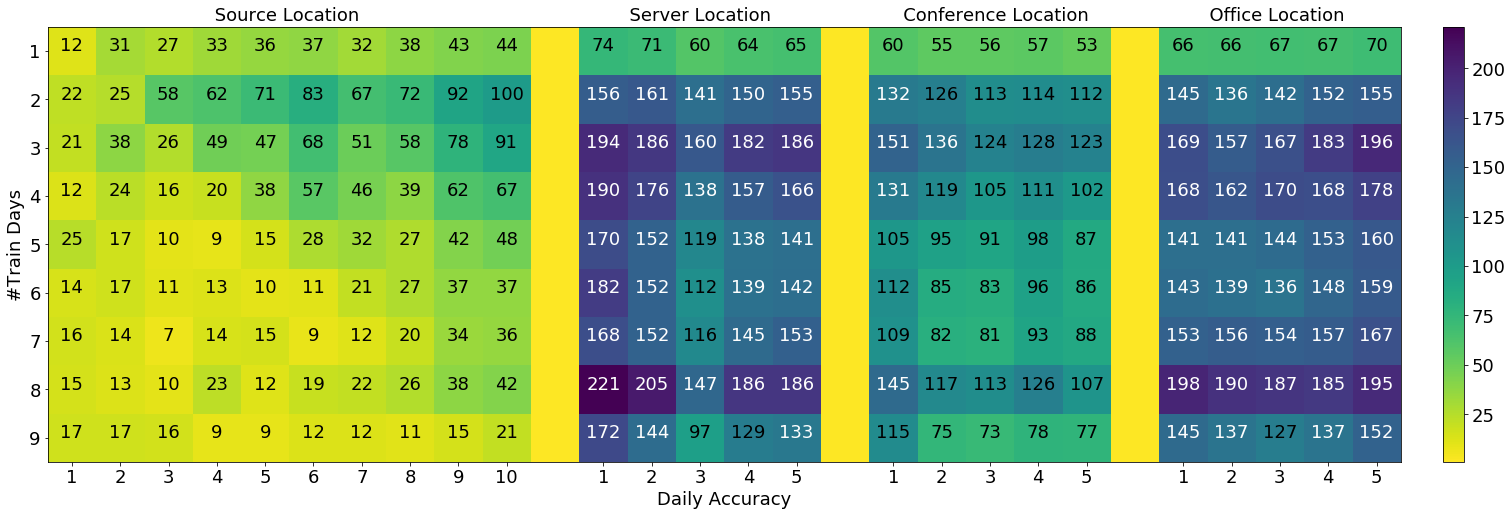

In [3]:
server_acc = np.zeros((9, 5), dtype=np.float32)
server_acc[0] = [
74.10897,
70.606224,
59.839115,
64.31805,
65.47871,
]

server_acc[1] = [
155.94753,
160.52863,
140.70935,
150.43015,
154.57262,
]

server_acc[2] = [
194.41815,
185.50781,
160.00072,
182.4422,
186.2875,
]

server_acc[3] = [
189.6603,
175.9739,
137.88228,
156.94084,
165.75111,
]

server_acc[4] = [
169.69714,
151.5175,
119.10062,
137.95694,
140.95293,
]

server_acc[5] = [
182.19139,
152.00285,
111.68112,
138.948,
141.59764,
]

server_acc[6] = [
168.11203,
151.9255,
116.184975,
145.14357,
153.19626,
]

server_acc[7] = [
220.95541,
204.73523,
147.33974,
186.29288,
186.28601,
]

server_acc[8] = [
172.00371,
143.54745,
96.67586,
128.63988,
133.21075,
]

conf_acc = np.zeros((9, 5), dtype=np.float32)
conf_acc[0] = [
59.575012,
55.258926,
55.828693,
56.60432,
53.13858,
]

conf_acc[1] = [
131.56438,
125.68266,
113.45247,
114.17891,
112.393524,
]

conf_acc[2] = [
150.86652,
136.28708,
123.64708,
127.9778,
123.316895,
]

conf_acc[3] = [
130.84227,
118.51044,
104.71784,
111.19163,
102.05305,
]

conf_acc[4] = [
104.698875,
95.44999,
91.2712,
98.415886,
87.1651,
]

conf_acc[5] = [
112.07308,
85.015625,
83.226425,
95.502655,
86.418625,
]

conf_acc[6] = [
109.3864,
82.093216,
80.69476,
92.720825,
88.13622,
]

conf_acc[7] = [
144.6,
117.06321,
112.95036,
125.72626,
106.95731,
]

conf_acc[8] = [
115.031654,
75.34557,
72.932785,
78.105606,
77.46829,
]

office_acc = np.zeros((9, 5), dtype=np.float32)
office_acc[0] = [
66.22435,
66.45249,
67.23388,
67.068214,
69.501366,
]

office_acc[1] = [
145.19452,
135.58597,
141.54645,
151.91061,
155.31467,
]

office_acc[2] = [
169.1121,
156.62935,
167.1545,
182.69571,
195.61552,
]

office_acc[3] = [
167.97226,
162.4474,
170.10437,
168.18958,
178.23631,
]

office_acc[4] = [
140.91931,
140.91873,
143.68048,
152.9017,
159.98665,
]

office_acc[5] = [
143.39027,
139.3789,
136.14352,
148.0456,
158.56575,
]

office_acc[6] = [
152.79497,
155.9571,
154.10178,
157.08667,
166.82278,
]

office_acc[7] = [
198.3233,
189.5584,
186.9158,
184.61226,
195.03796,
]

office_acc[8] = [
144.50774,
136.57948,
127.42963,
136.59575,
151.73233,
]

source_acc = np.zeros((9, 10), dtype=np.float32)
source_acc[0] = [
11.990659,
30.751284,
26.616936,
32.646584,
35.622505,
37.32638,
31.835108,
38.018852,
43.012627,
44.45189,
] 

source_acc[1] = [
22.056164,
25.193771,
57.742653,
62.22238,
70.74572,
82.93713,
66.87763,
72.201225,
92.39726,
100.46037,
]

source_acc[2] = [
21.169937,
38.24352,
26.317734,
48.74254,
47.21372,
67.55139,
50.533817,
57.778152,
77.651054,
90.79478,
]

source_acc[3] = [
12.496165,
23.87571,
16.481333,
19.699066,
37.922676,
57.495003,
46.213722,
38.773296,
61.760227,
67.07126,
]

source_acc[4] = [
24.634909,
16.80731,
10.095612,
9.203465,
15.257145,
28.29916,
32.033615,
27.046589,
41.589653,
48.200172,
]

source_acc[5] = [
14.1179285,
16.574547,
10.5326,
12.966356,
10.0618305,
10.542473,
21.150162,
26.848951,
36.681107,
37.02311,
]

source_acc[6] = [
16.006186,
13.886653,
6.9934945,
14.157902,
14.748276,
8.721276,
11.794207,
19.60939,
34.344177,
36.22099,
]

source_acc[7] = [
15.1314125,
12.509556,
10.425945,
22.938066,
11.848317,
19.38919,
21.587776,
26.026161,
38.13563,
41.851776,
]

source_acc[8] = [
16.881998,
16.646576,
16.117846,
8.938529,
8.991754,
12.210471,
12.205946,
10.798294,
14.914697,
21.133654,
]

def plot_confusion_matrix(cm, title, threshold):
    fig, ax = plt.subplots(figsize=(30, 8))
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.viridis_r)
    cbar = plt.colorbar(im, ax=ax, pad=0.025)
    cbar.ax.tick_params(labelsize=18) 

    plt.xticks(np.concatenate([np.arange(10), np.arange(11, 16), np.arange(17, 22), np.arange(23, 28)]),
               np.concatenate([np.arange(1, 11), np.arange(1, 6), np.arange(1, 6), np.arange(1, 6)]), fontsize=18)
    plt.yticks(np.arange(cm.shape[0]), np.arange(cm.shape[0])+1, fontsize=18)

    # Use white text if squares are dark; otherwise black.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if str(j) in ['10', '16', '22']:
          continue
        color = "white" if cm[i, j] > threshold else "black"
        plt.text(j, i, "{:.0f}".format(cm[i, j]), 
                 horizontalalignment="center", 
                 color=color,
                 fontsize=18)

    plt.title('                             Source Location                                               Server Location                       Conference Location                     Office Location', fontsize=18, loc='left')
    plt.ylabel('#Train Days', fontsize=18)
    plt.xlabel('Daily Accuracy', fontsize=18)
    return fig
   
acc = np.concatenate([source_acc, np.ones((9,1)), 
                      server_acc, np.ones((9,1)), 
                      conf_acc,   np.ones((9,1)), 
                      office_acc], axis=1)
fig = plot_confusion_matrix(acc, "", 130)
plt.savefig('Exp1-metric', bbox_inches='tight', pad_inches=0, dpi=400)

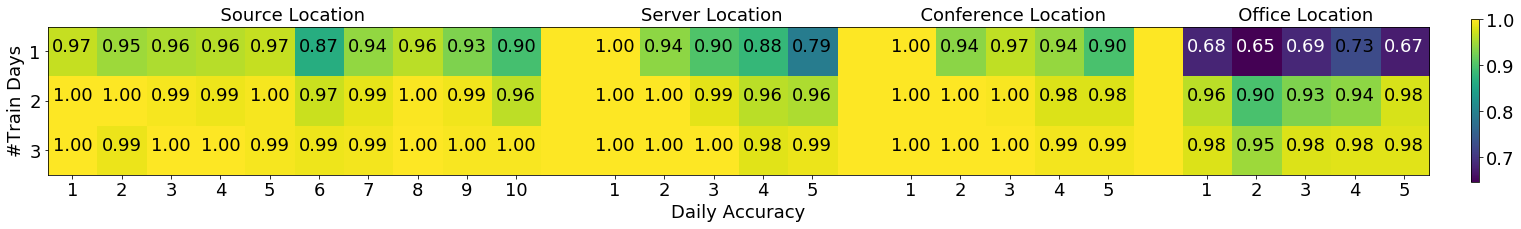

In [16]:
server_acc = np.zeros((3, 5), dtype=np.float32)
server_acc[0] = [
1.0,
0.9399999976158142,
0.9020000100135803,
0.8817635178565979,
0.7940000295639038]
server_acc[1] = [
1.0,
1.0,
0.9860000014305115,
0.9639278650283813,
0.9559999704360962
]
server_acc[2] = [
1.0,
1.0,
1.0,
0.9839679598808289,
0.9900000095367432]

conf_acc = np.zeros((3, 5), dtype=np.float32)
conf_acc[0] = [
1.0,
0.9380000233650208,
0.9660000205039978,
0.9440000057220459,
0.8980000019073486]
conf_acc[1] = [
1.0,
1.0,
0.9959999918937683,
0.9819999933242798,
0.9819999933242798]
conf_acc[2] = [
1.0,
1.0,
1.0,
0.9940000176429749,
0.9940000176429749]

office_acc = np.zeros((3, 5), dtype=np.float32)
office_acc[0] = [
0.6819999814033508,
0.6460000276565552,
0.6853707432746887,
0.7274549007415771,
0.6740000247955322]
office_acc[1] = [
0.9639999866485596,
0.8980000019073486,
0.9318637251853943,
0.9398797750473022,
0.9779999852180481]
office_acc[2] = [
0.9819999933242798,
0.9480000138282776,
0.9819639325141907,
0.9839679598808289,
0.984000027179718]

source_acc = np.zeros((3, 10), dtype=np.float32)
source_acc[0] = [
0.9684210419654846,
0.948421061038971,
0.9557894468307495,
0.9621052742004395,
0.969473659992218,
0.8663157820701599,
0.9431579113006592,
0.9631578922271729,
0.9315789341926575,
0.8957894444465637]
source_acc[1] = [
1.0,
1.0,
0.9947368502616882,
0.9915789365768433,
0.9957894682884216,
0.9715789556503296,
0.9873684048652649,
0.9978947639465332,
0.9926315546035767,
0.9642105102539062]
source_acc[2] = [
1.0,
0.9894737005233765,
1.0,
1.0,
0.9947368502616882,
0.9905263185501099,
0.9936842322349548,
1.0,
0.996842086315155,
0.996842086315155]

def plot_confusion_matrix(cm, title, threshold):
    fig, ax = plt.subplots(figsize=(30, 3))
    im = ax.imshow(cm, interpolation='nearest')
    cbar = plt.colorbar(im, ax=ax, pad=0.025)
    cbar.ax.tick_params(labelsize=18) 
    tick_locator = ticker.MaxNLocator(nbins=4)
    cbar.locator = tick_locator
    cbar.update_ticks()

    plt.xticks(np.concatenate([np.arange(10), np.arange(11, 16), np.arange(17, 22), np.arange(23, 28)]),
               np.concatenate([np.arange(1, 11), np.arange(1, 6), np.arange(1, 6), np.arange(1, 6)]), fontsize=18)
    plt.yticks(np.arange(cm.shape[0]), np.arange(cm.shape[0])+1, fontsize=18)

    # Use white text if squares are dark; otherwise black.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if str(j) in ['10', '16', '22']:
          continue
        color = "white" if cm[i, j] < threshold else "black"
        plt.text(j, i, "{:.2f}".format(cm[i, j]), 
                 horizontalalignment="center", 
                 color=color,
                 fontsize=18)

    plt.title('                              Source Location                                                Server Location                        Conference Location                       Office Location', fontsize=18, loc='left')
    plt.ylabel('#Train Days', fontsize=18)
    plt.xlabel('Daily Accuracy', fontsize=18)
    return fig

acc = np.concatenate([source_acc, np.ones((3,1)), 
                      server_acc, np.ones((3,1)), 
                      conf_acc,   np.ones((3,1)), 
                      office_acc], axis=1)

fig = plot_confusion_matrix(acc, "", 0.7)
plt.savefig('Exp2', bbox_inches='tight', pad_inches=0, dpi=400)

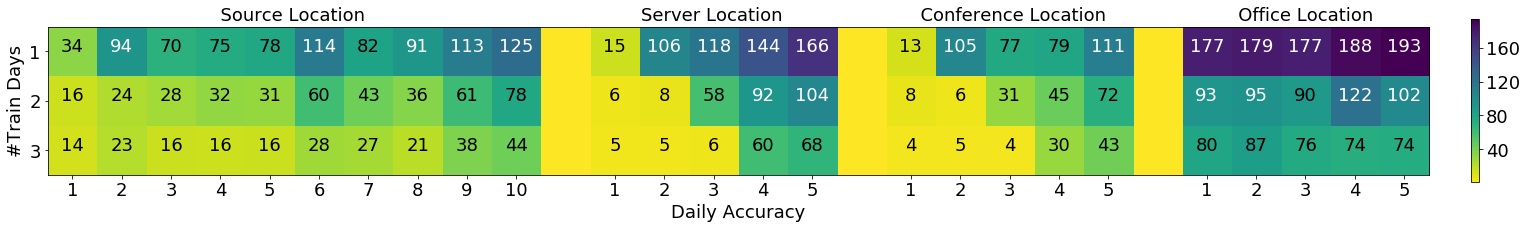

In [17]:
server_acc = np.zeros((3, 5), dtype=np.float32)
server_acc[0] = [
15.3004465,
105.87329,
118.47834,
143.86125,
166.12642,
]
server_acc[1] = [
6.020454,
7.643816,
57.50361,
92.490395,
104.41762,
]
server_acc[2] = [
5.193001,
5.286176,
6.1736383,
59.92814,
67.83326,
]

conf_acc = np.zeros((3, 5), dtype=np.float32)
conf_acc[0] = [
13.091384,
104.59276,
76.77021,
79.40834,
110.93062,
]
conf_acc[1] = [
7.504648,
5.834106,
31.298237,
45.21948,
72.25173,
]
conf_acc[2] = [
4.1676054,
4.53754,
4.2282443,
30.431574,
42.66944,

]

office_acc = np.zeros((3, 5), dtype=np.float32)
office_acc[0] = [
176.94077,
179.27692,
177.23233,
188.25284,
193.4718,
]
office_acc[1] = [
92.805016,
95.061104,
89.88271,
121.83127,
102.39744,
]
office_acc[2] = [
80.494774,
86.52028,
75.54001,
73.72,
74.20245,
]

source_acc = np.zeros((3, 10), dtype=np.float32)
source_acc[0] = [
34.243168,
93.79028,
69.91602,
75.27193,
78.16544,
113.50643,
81.55292,
91.30777,
112.53616,
125.48553,
]
source_acc[1] = [
15.857067,
23.847958,
28.032095,
32.256756,
31.383102,
59.97976,
43.425644,
36.078934,
61.27961,
77.96067,
]
source_acc[2] = [
14.055561,
22.801397,
16.454947,
15.860628,
16.056276,
28.483614,
26.760622,
21.121021,
38.39215,
43.59588,
]
  
def plot_confusion_matrix(cm, title, threshold):
    fig, ax = plt.subplots(figsize=(30, 3))
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.viridis_r)
    cbar = plt.colorbar(im, ax=ax, pad=0.025)
    cbar.ax.tick_params(labelsize=18) 
    tick_locator = ticker.MaxNLocator(nbins=5)
    cbar.locator = tick_locator
    cbar.update_ticks()

    plt.xticks(np.concatenate([np.arange(10), np.arange(11, 16), np.arange(17, 22), np.arange(23, 28)]),
               np.concatenate([np.arange(1, 11), np.arange(1, 6), np.arange(1, 6), np.arange(1, 6)]), fontsize=18)
    plt.yticks(np.arange(cm.shape[0]), np.arange(cm.shape[0])+1, fontsize=18)

    # Use white text if squares are dark; otherwise black.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if str(j) in ['10', '16', '22']:
          continue
        color = "white" if cm[i, j] > threshold else "black"
        plt.text(j, i, "{:.0f}".format(cm[i, j]), 
                 horizontalalignment="center", 
                 color=color,
                 fontsize=18)

    plt.title('                              Source Location                                                Server Location                        Conference Location                       Office Location', fontsize=18, loc='left')
    plt.ylabel('#Train Days', fontsize=18)
    plt.xlabel('Daily Accuracy', fontsize=18)
    return fig
   
acc = np.concatenate([source_acc, np.ones((3,1)), 
                      server_acc, np.ones((3,1)), 
                      conf_acc,   np.ones((3,1)), 
                      office_acc], axis=1)
fig = plot_confusion_matrix(acc, "", 90)
plt.savefig('Exp4', bbox_inches='tight', pad_inches=0, dpi=400)

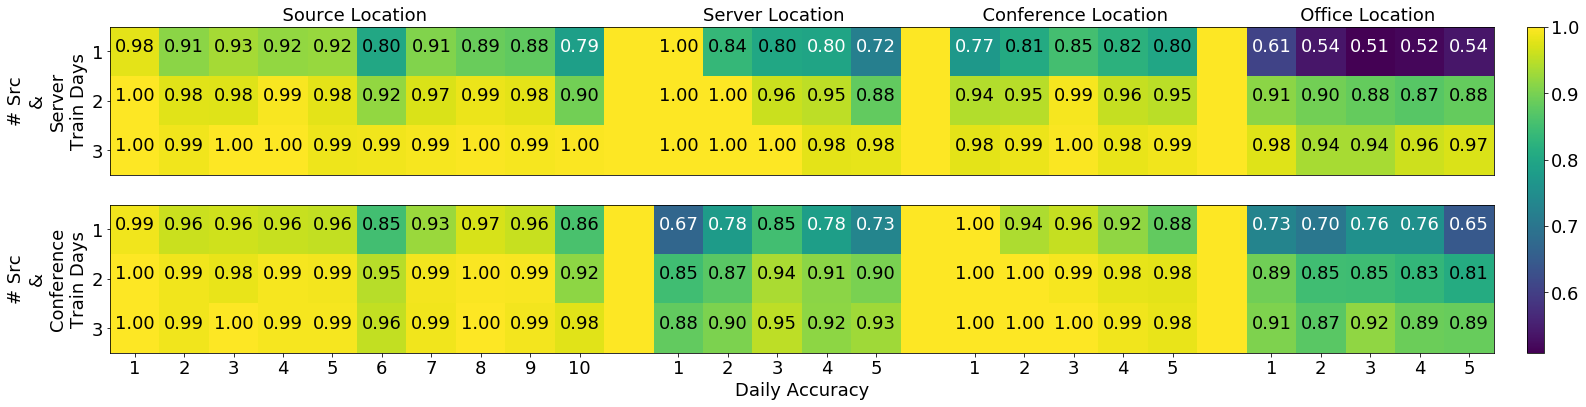

In [7]:
server_acc1 = np.zeros((3, 5), dtype=np.float32)
server_acc1[0] = [
0.6720321774482727,
0.777999997138977,
0.8519999980926514,
0.7835671305656433,
0.7319999933242798,
]
server_acc1[1] = [
0.849094569683075,
0.8740000128746033,
0.9380000233650208,
0.913827657699585,
0.9020000100135803,
]
server_acc1[2] = [
0.8812877535820007,
0.9039999842643738,
0.9520000219345093,
0.9158316850662231,
0.9300000071525574,
]

conf_acc1 = np.zeros((3, 5), dtype=np.float32)
conf_acc1[0] = [
1.0,
0.9399999976158142,
0.9559999704360962,
0.9179999828338623,
0.8820000290870667,
]
conf_acc1[1] = [
1.0,
1.0,
0.9940000176429749,
0.9819999933242798,
0.9800000190734863,
]
conf_acc1[2] = [
1.0,
1.0,
1.0,
0.9900000095367432,
0.984000027179718,  
]

office_acc1 = np.zeros((3, 5), dtype=np.float32)
office_acc1[0] = [
0.7300000190734863,
0.7039999961853027,
0.7555110454559326,
0.7555110454559326,
0.6460000276565552,
]
office_acc1[1] = [
0.8939999938011169,
0.8500000238418579,
0.8476954102516174,
0.8336673378944397,
0.8119999766349792,
]
office_acc1[2] = [
0.906000018119812,
0.8740000128746033,
0.9178356528282166,
0.8897795677185059,
0.8859999775886536,  
]

source_acc1 = np.zeros((3, 10), dtype=np.float32)
source_acc1[0] = [
0.9894737005233765,
0.961052656173706,
0.9642105102539062,
0.9589473605155945,
0.9557894468307495,
0.851578950881958,
0.9263157844543457,
0.969473659992218,
0.9578947424888611,
0.8589473962783813,
]
source_acc1[1] = [
1.0,
0.9893617033958435,
0.9842105507850647,
0.9926315546035767,
0.9915789365768433,
0.9473684430122375,
0.9915789365768433,
0.996842086315155,
0.9947368502616882,
0.9157894849777222,
]
source_acc1[2] = [
1.0,
0.9894737005233765,
1.0,
0.9936842322349548,
0.9936842322349548,
0.9557894468307495,
0.9894737005233765,
0.9989473819732666,
0.9915789365768433,
0.9778947234153748, 
]



server_acc2 = np.zeros((3, 5), dtype=np.float32)
server_acc2[0] = [
1.0,
0.8360000252723694,
0.8019999861717224,
0.7955911755561829,
0.7200000286102295,
]
server_acc2[1] = [
1.0,
1.0,
0.9599999785423279,
0.9519038200378418,
0.8820000290870667,
]
server_acc2[2] = [
1.0,
1.0,
1.0,
0.9799599051475525,
0.9819999933242798,
]

conf_acc2 = np.zeros((3, 5), dtype=np.float32)
conf_acc2[0] = [
0.7699999809265137,
0.8100000023841858,
0.8539999723434448,
0.8240000009536743,
0.800000011920929,
]
conf_acc2[1] = [
0.9440000057220459,
0.9480000138282776,
0.9940000176429749,
0.9559999704360962,
0.949999988079071,
]
conf_acc2[2] = [
0.9800000190734863,
0.9860000014305115,
0.9980000257492065,
0.984000027179718,
0.9900000095367432,
]

office_acc2 = np.zeros((3, 5), dtype=np.float32)
office_acc2[0] = [
0.6079999804496765,
0.5379999876022339,
0.509018063545227,
0.5170340538024902,
0.5379999876022339,
]
office_acc2[1] = [
0.9139999747276306,
0.8960000276565552,
0.8837675452232361,
0.8717435002326965,
0.8840000033378601,
]
office_acc2[2] = [
0.9760000109672546,
0.9359999895095825,
0.9358717203140259,
0.9619238376617432,
0.972000002861023,
]

source_acc2 = np.zeros((3, 10), dtype=np.float32)
source_acc2[0] = [
0.9789473414421082,
0.9147368669509888,
0.9347368478775024,
0.9200000166893005,
0.9242105484008789,
0.8031578660011292,
0.906315803527832,
0.8873684406280518,
0.8799999952316284,
0.785263180732727,
]
source_acc2[1] = [
1.0,
0.978723406791687,
0.975789487361908,
0.9947368502616882,
0.9800000190734863,
0.9210526347160339,
0.9715789556503296,
0.9863157868385315,
0.9789473414421082,
0.8957894444465637,
]
source_acc2[2] = [
1.0,
0.9894737005233765,
1.0,
0.9989473819732666,
0.9873684048652649,
0.9894737005233765,
0.9936842322349548,
0.9978947639465332,
0.9926315546035767,
0.996842086315155,
]

acc2 = np.concatenate([source_acc1, np.ones((3,1)), 
                      server_acc1, np.ones((3,1)), 
                      conf_acc1,   np.ones((3,1)), 
                      office_acc1], axis=1)
acc1 = np.concatenate([source_acc2, np.ones((3,1)), 
                      server_acc2, np.ones((3,1)), 
                      conf_acc2,   np.ones((3,1)), 
                      office_acc2], axis=1)

from matplotlib.colors import Normalize

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(60, 6))

im = ax1.imshow(acc1, interpolation='nearest', norm=Normalize(vmin=np.min([acc1, acc2]), vmax=np.max([acc1, acc2])))
im = ax2.imshow(acc2, interpolation='nearest', norm=Normalize(vmin=np.min([acc1, acc2]), vmax=np.max([acc1, acc2])))

# Use white text if squares are dark; otherwise black.
for ax, cm in zip([ax1, ax2], [acc1, acc2]):
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      if str(j) in ['10', '16', '22']:
        continue
      color = "white" if cm[i, j] < 0.8 else "black"
      ax.text(j, i, "{:.2f}".format(cm[i, j]), 
               horizontalalignment="center", 
               color=color,
               fontsize=18)


ax1.set_title('                              Source Location                                                Server Location                        Conference Location                       Office Location', fontsize=18, loc='left')
ax1.set_ylabel('# Src\n&\nServer\nTrain Days', fontsize=18)
ax2.set_ylabel('# Src\n&\nConference\nTrain Days', fontsize=18)
ax2.set_xlabel('Daily Accuracy', fontsize=18) 
  
plt.sca(ax1)
plt.xticks(np.concatenate([np.arange(10), np.arange(11, 16), np.arange(17, 22), np.arange(23, 28)]),
           [], 
           fontsize=18)
plt.yticks(np.arange(acc1.shape[0]), 
           np.arange(acc1.shape[0])+1, 
           fontsize=18)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) 
  
plt.sca(ax2)
plt.xticks(np.concatenate([np.arange(10), np.arange(11, 16), np.arange(17, 22), np.arange(23, 28)]),
           np.concatenate([np.arange(1, 11), np.arange(1, 6), np.arange(1, 6), np.arange(1, 6)]), 
           fontsize=18)
plt.yticks(np.arange(acc1.shape[0]), 
           np.arange(acc1.shape[0])+1, 
           fontsize=18)

cbar = fig.colorbar(im, ax=[ax1, ax2], pad=0.01)
cbar.ax.tick_params(labelsize=18) 
plt.savefig('Exp5', bbox_inches='tight', pad_inches=0.1, dpi=400)

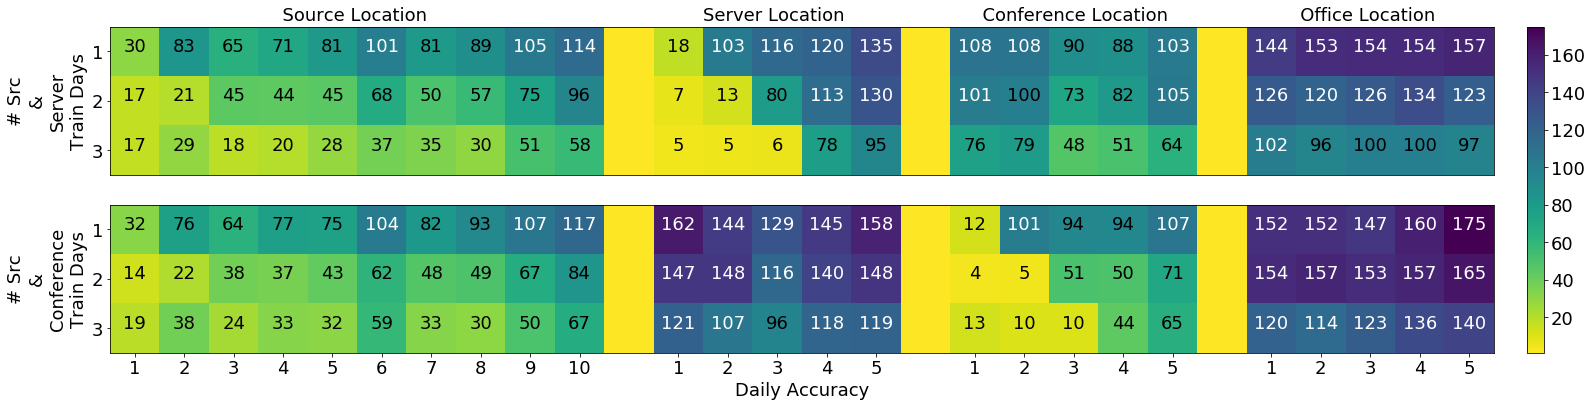

In [22]:
server_acc1 = np.zeros((3, 5), dtype=np.float32)
server_acc1[0] = [
162.47284,
143.77559,
129.45589,
145.07466,
158.343,
]
server_acc1[1] = [
147.12073,
147.61925,
116.08365,
139.76758,
147.96034,
]
server_acc1[2] = [
121.259186,
106.86231,
96.36677,
118.26045,
119.23956,
]

conf_acc1 = np.zeros((3, 5), dtype=np.float32)
conf_acc1[0] = [
12.010245,
100.98153,
94.16187,
93.757454,
106.84175,
]
conf_acc1[1] = [
3.7269535,
4.9889116,
51.10485,
49.77287,
70.76286,
]
conf_acc1[2] = [
12.839754,
10.341443,
9.840086,
43.91597,
64.95046,
]

office_acc1 = np.zeros((3, 5), dtype=np.float32)
office_acc1[0] = [
151.76996,
151.67609,
147.49875,
159.69984,
174.95964,
]
office_acc1[1] = [
154.1931,
156.85022,
152.84337,
156.93828,
164.86165,
]
office_acc1[2] = [
120.26715,
113.86556,
123.445435,
136.18549,
139.61833,
]

source_acc1 = np.zeros((3, 10), dtype=np.float32)
source_acc1[0] = [
31.721582,
76.08193,
63.8962,
76.58086,
75.4111,
103.66544,
82.38785,
93.388466,
106.62149,
116.67148,
]
source_acc1[1] = [
13.878926,
21.624964,
37.949627,
36.76156,
42.58108,
61.82724,
47.803074,
49.47754,
67.49947,
84.22236,
]
source_acc1[2] = [
19.288057,
37.778236,
24.155884,
32.53168,
31.545374,
58.87285,
32.82459,
30.39384,
50.404884,
67.13385,
]



server_acc2 = np.zeros((3, 5), dtype=np.float32)
server_acc2[0] = [
17.601917,
102.878914,
115.65045,
119.53677,
134.93855,
]
server_acc2[1] = [
7.211972,
12.639926,
79.597534,
112.60121,
129.59512,
]
server_acc2[2] = [
4.5913854,
5.2907453,
5.8245664,
78.19573,
95.32791,
]

conf_acc2 = np.zeros((3, 5), dtype=np.float32)
conf_acc2[0] = [
108.49578,
108.09664,
89.95725,
87.63985,
102.935616,
]
conf_acc2[1] = [
101.395645,
99.55194,
72.789825,
81.66571,
104.87168,
]
conf_acc2[2] = [
75.50395,
79.32062,
47.83907,
50.96725,
63.677425,
]

office_acc2 = np.zeros((3, 5), dtype=np.float32)
office_acc2[0] = [
144.10245,
152.63573,
154.23048,
154.37373,
156.7854,
]
office_acc2[1] = [
125.95093,
119.64743,
125.81934,
133.76376,
123.13528,
]
office_acc2[2] = [
102.03034,
96.069916,
99.78157,
99.68641,
96.911674,
]

source_acc2 = np.zeros((3, 10), dtype=np.float32)
source_acc2[0] = [
30.395123,
83.29735,
64.60892,
70.86438,
81.10785,
100.637886,
80.53865,
88.53379,
104.79539,
113.82904,
]
source_acc2[1] = [
16.876461,
20.629599,
44.614944,
43.983543,
45.35772,
68.00021,
50.288925,
56.810673,
74.970055,
96.1314,
]
source_acc2[2] = [
16.937307,
29.104713,
18.343643,
20.17379,
28.289837,
37.241512,
34.775032,
29.976727,
51.286926,
57.615158,
]

acc2 = np.concatenate([source_acc1, np.ones((3,1)), 
                      server_acc1, np.ones((3,1)), 
                      conf_acc1,   np.ones((3,1)), 
                      office_acc1], axis=1)
acc1 = np.concatenate([source_acc2, np.ones((3,1)), 
                      server_acc2, np.ones((3,1)), 
                      conf_acc2,   np.ones((3,1)), 
                      office_acc2], axis=1)

from matplotlib.colors import Normalize

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(60, 6))

im = ax1.imshow(acc1, interpolation='nearest', norm=Normalize(vmin=np.min([acc1, acc2]), vmax=np.max([acc1, acc2])), cmap=plt.cm.viridis_r)
im = ax2.imshow(acc2, interpolation='nearest', norm=Normalize(vmin=np.min([acc1, acc2]), vmax=np.max([acc1, acc2])), cmap=plt.cm.viridis_r)

# Use white text if squares are dark; otherwise black.
for ax, cm in zip([ax1, ax2], [acc1, acc2]):
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      if str(j) in ['10', '16', '22']:
        continue
      color = "white" if cm[i, j] > 100 else "black"
      ax.text(j, i, "{:.0f}".format(cm[i, j]), 
               horizontalalignment="center", 
               color=color,
               fontsize=18)


ax1.set_title('                              Source Location                                                Server Location                        Conference Location                       Office Location', fontsize=18, loc='left')
ax1.set_ylabel('# Src\n&\nServer\nTrain Days', fontsize=18)
ax2.set_ylabel('# Src\n&\nConference\nTrain Days', fontsize=18)
ax2.set_xlabel('Daily Accuracy', fontsize=18) 
  
plt.sca(ax1)
plt.xticks(np.concatenate([np.arange(10), np.arange(11, 16), np.arange(17, 22), np.arange(23, 28)]),
           [], 
           fontsize=18)
plt.yticks(np.arange(acc1.shape[0]), 
           np.arange(acc1.shape[0])+1, 
           fontsize=18)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) 
  
plt.sca(ax2)
plt.xticks(np.concatenate([np.arange(10), np.arange(11, 16), np.arange(17, 22), np.arange(23, 28)]),
           np.concatenate([np.arange(1, 11), np.arange(1, 6), np.arange(1, 6), np.arange(1, 6)]), 
           fontsize=18)
plt.yticks(np.arange(acc1.shape[0]), 
           np.arange(acc1.shape[0])+1, 
           fontsize=18)

cbar = fig.colorbar(im, ax=[ax1, ax2], pad=0.01)
cbar.ax.tick_params(labelsize=18) 
plt.savefig('Exp5-metric', bbox_inches='tight', pad_inches=0.1, dpi=400)